In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
from tqdm import tqdm

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy, mean_squared_error
from tensorflow.keras.preprocessing import *
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.ops import math_ops
from tensorflow.python.keras import backend as K
from tensorflow.python.framework import ops
from tensorflow.python.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from function import *

import cv2
import os
from glob import glob
import random

In [65]:
filter1, filter2, filter3 = 128, 64, 3
kernel_s1, kernel_s2, kernel_s3 = 9,3,5
upscale_factor = 3

input_size = 33
output_size = input_size - kernel_s1 - kernel_s2 - kernel_s3 + 3 # 19
shape = (None,None,3)
pad = abs(input_size - output_size) // 2 # 7
stride = 14

batch_size = 128
epochs = 200

In [66]:
def SRCNN(shape):
    initializer = initializers.GlorotNormal()

    inputs = tf.keras.Input(shape=shape, name='input')
    conv1 = Conv2D(filters=filter1, kernel_size=kernel_s1, activation='relu',kernel_initializer=initializer, bias_initializer='zeros')(inputs)
    conv2 = Conv2D(filters=filter2, kernel_size=kernel_s2,activation='relu',kernel_initializer=initializer, bias_initializer='zeros')(conv1)
    conv3 = Conv2D(filters=filter3, kernel_size=kernel_s3,activation='linear',kernel_initializer=initializer, bias_initializer='zeros')(conv2)

    model = Model(inputs=inputs, outputs=conv3)

    return model

# print(SRCNN.summary())

# save_path = "./model/SRCNN/SRCNN_200EPOCHS.h5"
# save_path = "./model/SRCNN/SRCNN_200EPOCHS_2.h5" #ipynb로 돌렸을 때
save_path = "./model/SRCNN/SRCNN_128batch_200epoch.h5"

SRCNN_predict = SRCNN(shape)
SRCNN_predict.load_weights(save_path)

img shape: (256, 256, 3)


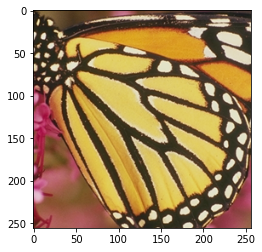

In [67]:
hr_img_path = './image_data/Set5/butterfly.png'

hr_img = cv2.imread(hr_img_path)
hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2RGB)
print("img shape: {}".format(hr_img.shape))

plt.imshow(hr_img)

hr_img = hr_img.astype('float') / 255
temp_img = cv2.resize(hr_img, dsize=(0,0), fx = 1/upscale_factor, fy = 1/upscale_factor,
                interpolation = cv2.INTER_AREA)
bicubic_img = cv2.resize(temp_img, dsize=(0,0), fx = upscale_factor, fy = upscale_factor,
                interpolation = cv2.INTER_CUBIC)

input_img = bicubic_img[np.newaxis, :]
srcnn_img = SRCNN_predict.predict(input_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'srcnn_img')

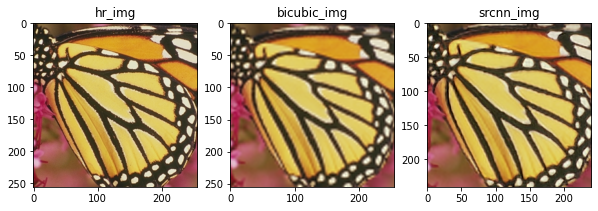

In [68]:
fig, axes = plt.subplots(1,3, figsize = (10,5))

axes[0].imshow(hr_img)
axes[1].imshow(bicubic_img)
axes[2].imshow(np.squeeze(srcnn_img))

axes[0].set_title('hr_img')
axes[1].set_title('bicubic_img')
axes[2].set_title('srcnn_img')